In [1]:
# File processing 
import glob

# Data processing 
import numpy as np

# Data display
import matplotlib
import matplotlib.pyplot as plt

# Constants

In [2]:
RESULTS_ROOT_TREACH_3D = 'tech3d_results_trussart/'
RESULTS_ROOT_REACH_3D = '../../../previous_works/reach3d/'

# Seeds

# Load losse results

## TECH-3D

In [3]:
def get_lambda_from_file_name(file_name, two_params):
    file_name_splitted = file_name.split('_')
    
    if two_params:
        lambda_param_1 = file_name_splitted[-2]
        lambda_param_2 = file_name_splitted[-1]
        lambda_param_2 = lambda_param_2[:-4]
        lambda_param = lambda_param_1 + '-' + lambda_param_2
    else: 
        lambda_param = file_name_splitted[-1]
        lambda_param = lambda_param[:-4]
    return lambda_param

In [4]:
def get_losses_and_labels(root, file_name_prefix, two_params=False):
    
    losses = []
    losses_labels = []

    for file_name in glob.glob(root + file_name_prefix + '_*.txt'):
        losses.append(np.loadtxt(file_name))
        losses_labels.append(get_lambda_from_file_name(file_name, two_params))
        
    return losses, losses_labels

In [5]:
def plot_losses_and_labels(losses, labels):
    
    fig, axes = plt.subplots(1, 1, figsize=(20,10))

    for i in range(len(losses)):

        loss = losses[i]
        number_of_epochs = len(loss)
        axes.plot(range(1, number_of_epochs + 1), loss, label=labels[i])

    axes.legend()
    axes.set(xlabel='Number of epochs')

    plt.show()

# Best architectures on 100 epochs

In [6]:
non_ae_synthetic_random_linear_losses_trussart, non_ae_synthetic_random_linear_losses_labels_trussart = \
    get_losses_and_labels(RESULTS_ROOT_TREACH_3D + 'synthetic_random/linear/', 'non_ae_synthetic_random_linear_trussart_test_kabsch_losses_all_epochs')

In [7]:
non_ae_synthetic_random_linear_losses_labels_trussart

['0.11', '0.1', '10', '1', '0']

In [8]:
non_ae_synthetic_random_linear_losses, non_ae_synthetic_random_linear_losses_labels = \
    get_losses_and_labels(RESULTS_ROOT_TREACH_3D + 'synthetic_random/linear/', 'non_ae_synthetic_random_linear_test_kabsch_losses_all_epochs')

In [9]:
non_ae_synthetic_random_linear_losses_labels

['0.11', '0', '10', '1', '0.1']

In [10]:
non_ae_synthetic_biological_2_bi_lstm_losses_trussart, non_ae_synthetic_biological_2_bi_lstm_losses_labels_trussart = \
    get_losses_and_labels(RESULTS_ROOT_TREACH_3D + 'synthetic_biological/linear/', 'non_ae_synthetic_biological_2_linear_trussart_test_kabsch_losses_all_epochs', two_params=True)

In [11]:
non_ae_synthetic_biological_2_bi_lstm_losses_labels_trussart

['0-1', '0-0', '1-1', '10-10', '0.11-0.11', '1-10']

In [12]:
non_ae_synthetic_biological_2_bi_lstm_losses, non_ae_synthetic_biological_2_bi_lstm_losses_labels = \
    get_losses_and_labels(RESULTS_ROOT_TREACH_3D + 'synthetic_biological/linear/', 'non_ae_synthetic_biological_2_linear_test_kabsch_losses_all_epochs', two_params=True)

In [13]:
non_ae_synthetic_biological_2_bi_lstm_losses_labels

['0.11-0.11', '10-10', '0-0', '0-1', '1-1', '1-10']

In [14]:
np.argmin(non_ae_synthetic_random_linear_losses_trussart[0])

44

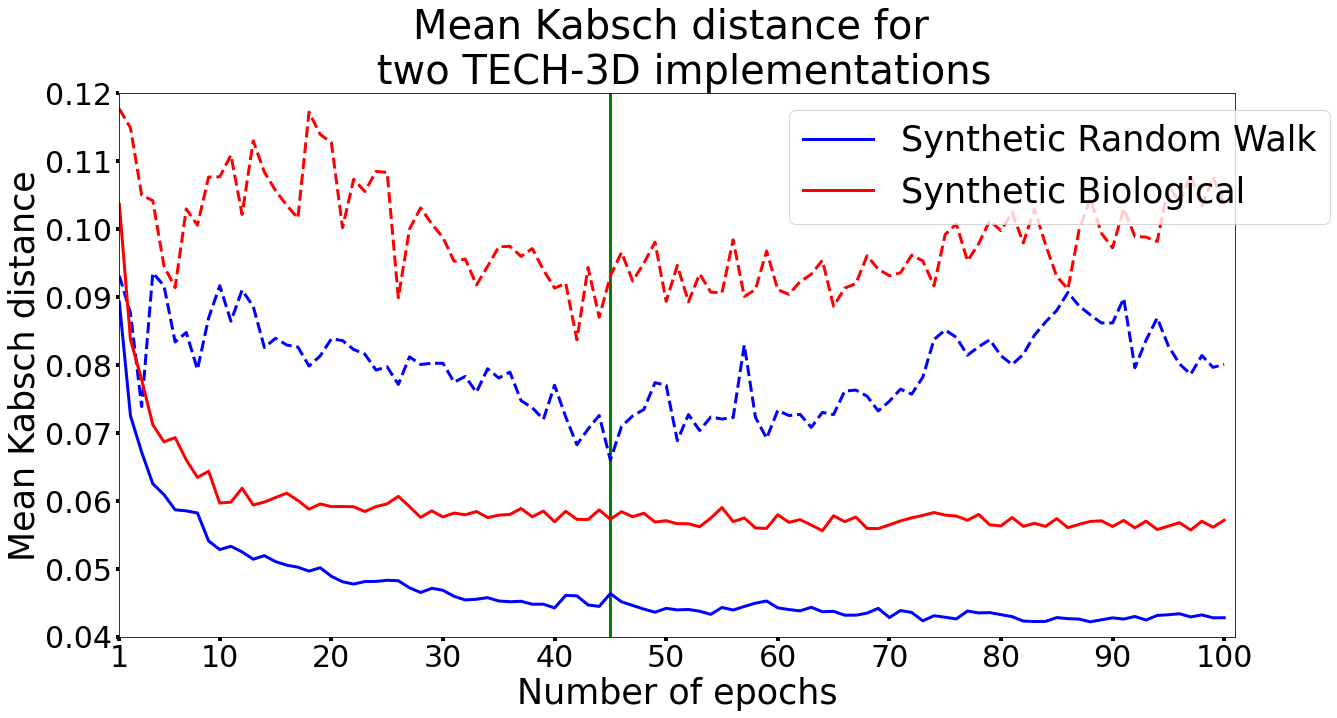

In [15]:
fig, axs = plt.subplots(1, 1, figsize=(20,10))

nb_epochs = 100

axs.plot(range(1, nb_epochs + 1), non_ae_synthetic_random_linear_losses[0], 
         label='Synthetic Random Walk', color='blue', linewidth=3)
axs.plot(range(1, nb_epochs + 1), non_ae_synthetic_random_linear_losses_trussart[0], 
         color='blue', linestyle='dashed', linewidth=3)

axs.plot(range(1, nb_epochs + 1), non_ae_synthetic_biological_2_bi_lstm_losses[0], 
         label='Synthetic Biological', color='red', linewidth=3)
axs.plot(range(1, nb_epochs + 1), non_ae_synthetic_biological_2_bi_lstm_losses_trussart[4], 
         color='red', linestyle='dashed', linewidth=3)

# axs.hlines(0.00122, 0, nb_epochs, colors='red', \
#            linestyles='dashed', label='Perfect prediction', linewidth=3)

axs.vlines(45, 0, 2, colors='green', linestyles='solid', linewidth=3)

axs.set_title('Mean Kabsch distance for \n two TECH-3D implementations', size=40)

axs.set_xlabel('Number of epochs', fontsize = 35)
axs.set_ylabel('Mean Kabsch distance', fontsize = 35)
plt.legend(fontsize=35)

axs.tick_params(axis='both', which='major', labelsize=30, width=4)

# axs.set_ylim(-0.01, loss_results['mean_kabsch_distance'][0] + 0.01)

plt.legend(fontsize=35, loc=(0.60, 0.76))
l = list(range(0, nb_epochs+1, 10))
l[0] = 1
plt.xticks(ticks=l, labels=l)

axs.set_xlim(1, nb_epochs+1)
axs.set_ylim(0.04, 0.12)

plt.savefig('mean_kabsch_distance_final_architectures_tech3d.png')
plt.show()

### Synthetic random

In [16]:
RESULTS_ROOT_TREACH_3D_SYNTHETIC_RANDOM = RESULTS_ROOT_TREACH_3D + 'synthetic_random/'

#### Linear

In [17]:
CURRENT_ROOT = RESULTS_ROOT_TREACH_3D_SYNTHETIC_RANDOM + 'linear/'

##### Combined Losses

In [18]:
non_ae_synthetic_random_linear_losses, non_ae_synthetic_random_linear_losses_labels = \
    get_losses_and_labels(CURRENT_ROOT, 'non_ae_synthetic_random_linear_losses')

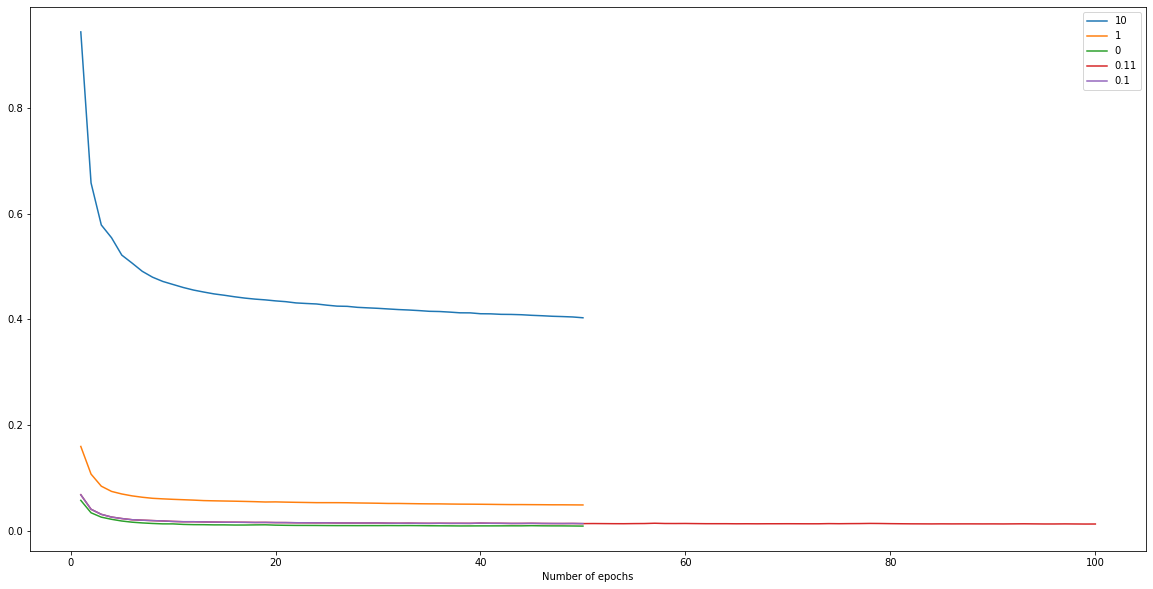

In [19]:
plot_losses_and_labels(non_ae_synthetic_random_linear_losses, non_ae_synthetic_random_linear_losses_labels)

###### Distance losses

In [20]:
non_ae_synthetic_random_linear_test_distance_losses, \
    non_ae_synthetic_random_linear_test_distance_losses_labels = \
    get_losses_and_labels(CURRENT_ROOT, 'non_ae_synthetic_random_linear_test_distance_losses_all_epochs')

In [21]:
non_ae_synthetic_random_linear_train_distance_losses, \
    non_ae_synthetic_random_linear_train_distance_losses_labels = \
    get_losses_and_labels(CURRENT_ROOT, 'non_ae_synthetic_random_linear_train_distance_losses_all_epochs')

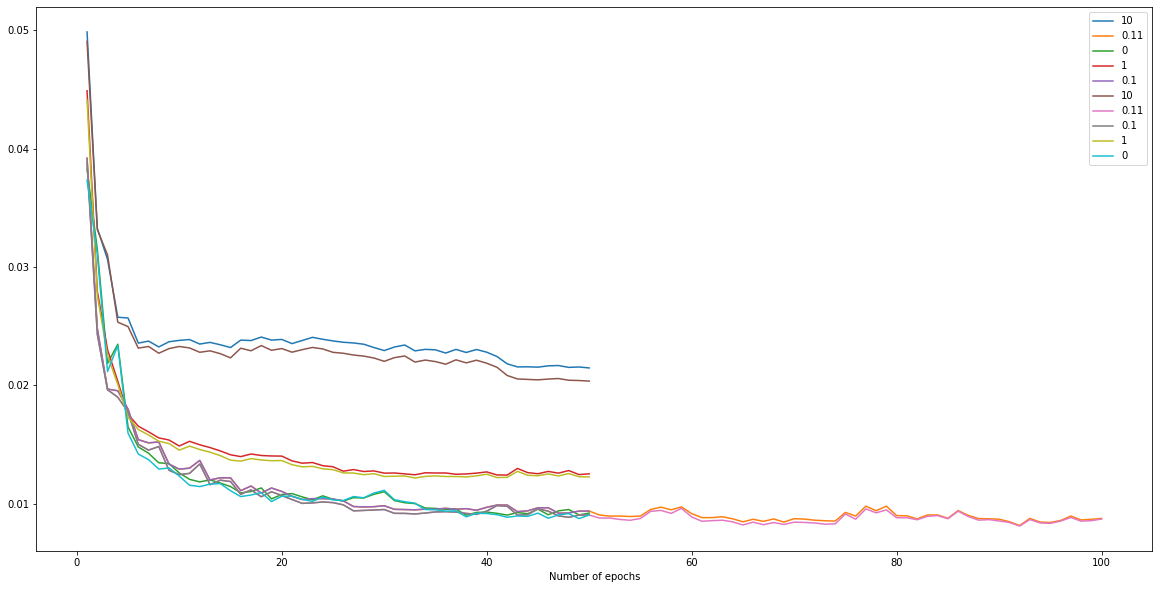

In [22]:
plot_losses_and_labels(non_ae_synthetic_random_linear_test_distance_losses + \
                       non_ae_synthetic_random_linear_train_distance_losses, \
                       non_ae_synthetic_random_linear_test_distance_losses_labels + \
                      non_ae_synthetic_random_linear_train_distance_losses_labels)

###### Kabsch losses

In [23]:
non_ae_synthetic_random_linear_test_kabsch_losses, \
    non_ae_synthetic_random_linear_test_kabsch_losses_labels = \
    get_losses_and_labels(CURRENT_ROOT, 'non_ae_synthetic_random_linear_test_kabsch_losses_all_epochs')

In [24]:
non_ae_synthetic_random_linear_train_kabsch_losses, \
    non_ae_synthetic_random_linear_train_kabsch_losses_labels = \
    get_losses_and_labels(CURRENT_ROOT, 'non_ae_synthetic_random_linear_train_kabsch_losses_all_epochs')

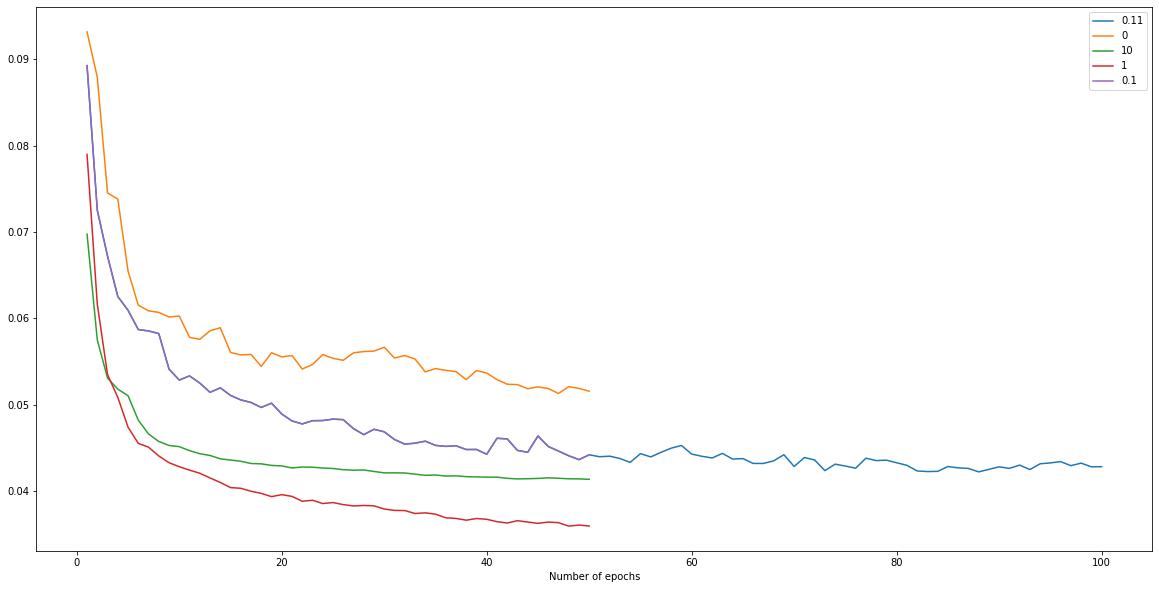

In [25]:
plot_losses_and_labels(non_ae_synthetic_random_linear_test_kabsch_losses, \
                       non_ae_synthetic_random_linear_test_kabsch_losses_labels)

###### Trussart Kabsch losses

In [26]:
non_ae_synthetic_random_linear_trussart_test_kabsch_losses, \
    non_ae_synthetic_random_linear_trussart_test_kabsch_losses_labels = \
    get_losses_and_labels(CURRENT_ROOT, 'non_ae_synthetic_random_linear_trussart_test_kabsch_losses_all_epochs')

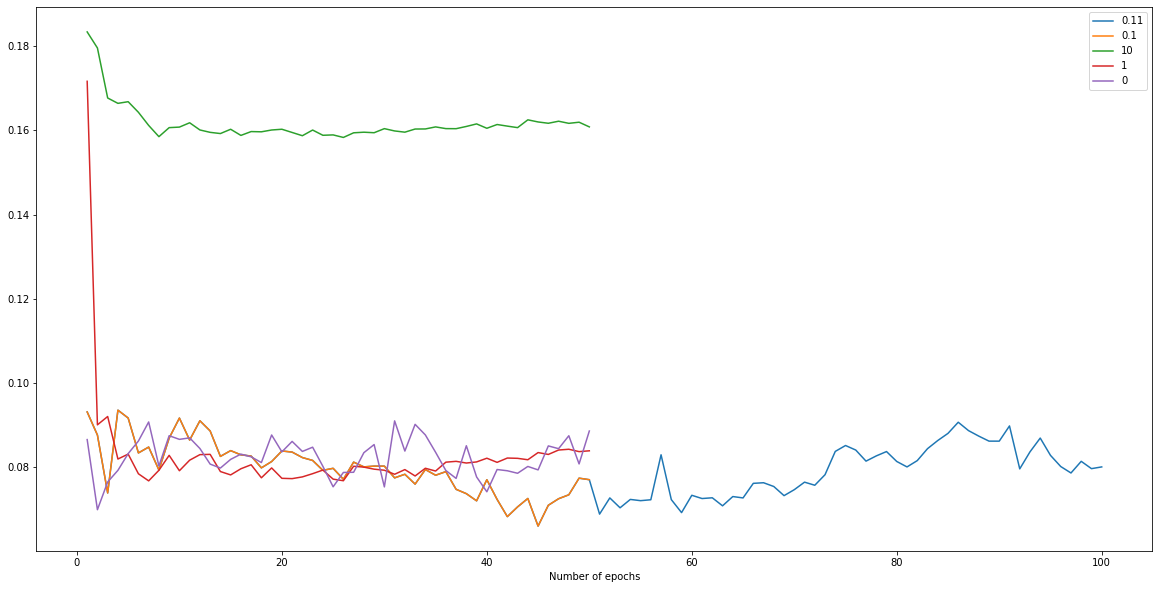

In [27]:
plot_losses_and_labels(non_ae_synthetic_random_linear_trussart_test_kabsch_losses, \
                       non_ae_synthetic_random_linear_trussart_test_kabsch_losses_labels)

##### Additional plots

In [28]:
label_to_test_kabsch_loss = dict()

for i in range(len(non_ae_synthetic_random_linear_test_kabsch_losses)):
    
    label_to_test_kabsch_loss[non_ae_synthetic_random_linear_test_kabsch_losses_labels[i]] =\
        non_ae_synthetic_random_linear_test_kabsch_losses[i]

In [29]:
label_to_trussart_test_kabsch_loss = dict()

for i in range(len(non_ae_synthetic_random_linear_test_kabsch_losses)):
    
    label_to_trussart_test_kabsch_loss[non_ae_synthetic_random_linear_trussart_test_kabsch_losses_labels[i]] =\
        non_ae_synthetic_random_linear_trussart_test_kabsch_losses[i]

In [30]:
print(np.min(label_to_trussart_test_kabsch_loss['0']))
print(np.argmin(label_to_trussart_test_kabsch_loss['0']))

print(np.min(label_to_trussart_test_kabsch_loss['0.1']))
print(np.argmin(label_to_trussart_test_kabsch_loss['0.1']))

print(np.min(label_to_trussart_test_kabsch_loss['1']))
print(np.argmin(label_to_trussart_test_kabsch_loss['1']))

print(np.min(label_to_trussart_test_kabsch_loss['10']))
print(np.argmin(label_to_trussart_test_kabsch_loss['10']))

0.06990395177558759
1
0.06601090145596014
44
0.07675163664531272
6
0.15832526183381979
25


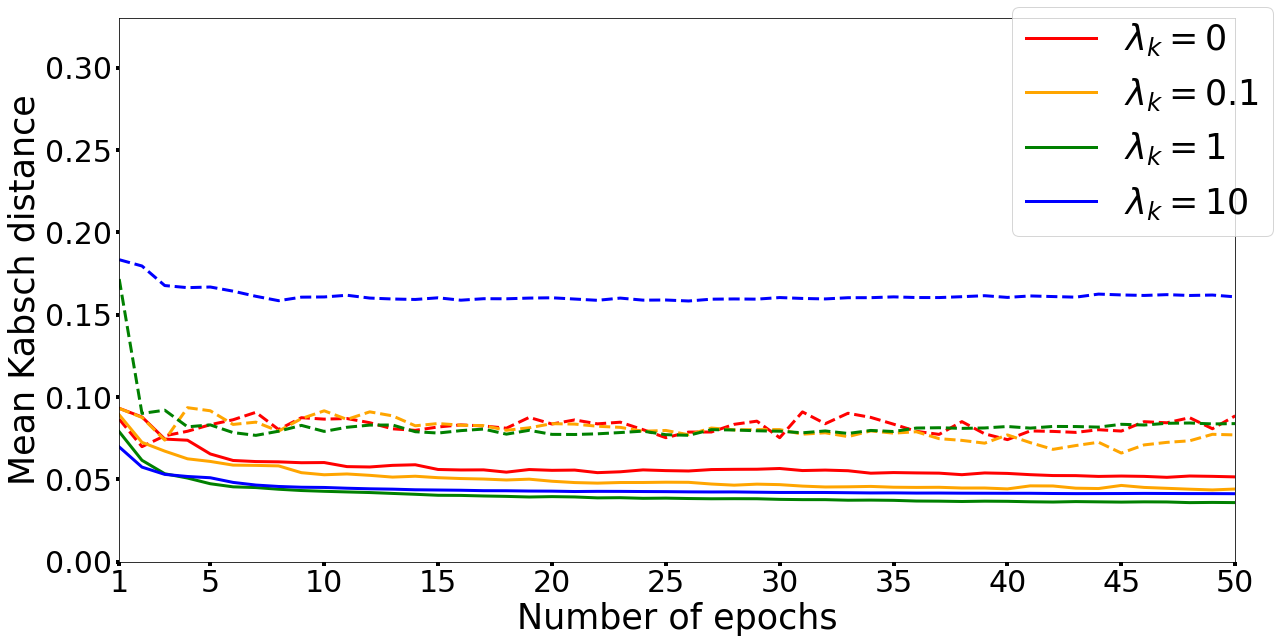

In [31]:
fig, axs = plt.subplots(1, 1, figsize=(20,10))

lambda_kabsch_0_trussart = label_to_trussart_test_kabsch_loss['0']
lambda_kabsch_0 = label_to_test_kabsch_loss['0']

lambda_kabsch_01_trussart = label_to_trussart_test_kabsch_loss['0.1']
lambda_kabsch_01 = label_to_test_kabsch_loss['0.1']

lambda_kabsch_1_trussart = label_to_trussart_test_kabsch_loss['1']
lambda_kabsch_1 = label_to_test_kabsch_loss['1']

lambda_kabsch_10_trussart = label_to_trussart_test_kabsch_loss['10']
lambda_kabsch_10 = label_to_test_kabsch_loss['10']

number_of_epochs = len(lambda_kabsch_01)

axs.plot(range(1,number_of_epochs+1), lambda_kabsch_0, label=r'$\lambda_k = 0$', color='red', linewidth=3)
axs.plot(range(1,number_of_epochs+1), lambda_kabsch_0_trussart, linestyle='dashed', color='red', linewidth=3)

axs.plot(range(1,number_of_epochs+1), lambda_kabsch_01, label=r'$\lambda_k = 0.1$', color='orange', linewidth=3)
axs.plot(range(1,number_of_epochs+1), lambda_kabsch_01_trussart, linestyle='dashed', color='orange', linewidth=3)

axs.plot(range(1,number_of_epochs+1), lambda_kabsch_1, label=r'$\lambda_k = 1$', color='green', linewidth=3)
axs.plot(range(1,number_of_epochs+1), lambda_kabsch_1_trussart, linestyle='dashed', color='green', linewidth=3)

axs.plot(range(1,number_of_epochs+1), lambda_kabsch_10, label=r'$\lambda_k = 10$', color='blue', linewidth=3)
axs.plot(range(1,number_of_epochs+1), lambda_kabsch_10_trussart, linestyle='dashed', color='blue', linewidth=3)

axs.set_xlabel('Number of epochs', fontsize = 35)
axs.set_ylabel('Mean Kabsch distance', fontsize = 35)
plt.legend(fontsize=35, loc=(0.8, 0.6))

axs.set_ylim(0, 0.33)
axs.set_xlim(1, number_of_epochs)

l = list(range(0, number_of_epochs+1, 5))
l[0] = 1
plt.xticks(ticks=l, labels=l)

axs.tick_params(axis='both', which='major', labelsize=30, width=4)

plt.savefig('trussart_mean_kabsch_distance_synthetic_random_linear.png')
plt.show()

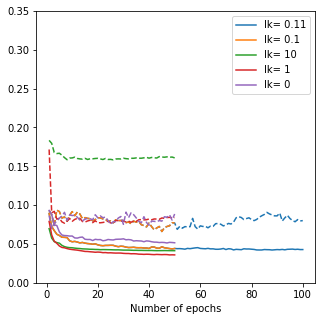

In [32]:
fig, axes = plt.subplots(1, 1, figsize=(5,5))

for label in label_to_trussart_test_kabsch_loss.keys():
    
    color=next(axes._get_lines.prop_cycler)['color']
    number_of_epochs = len(label_to_test_kabsch_loss[label])
    axes.plot(range(1, number_of_epochs + 1), label_to_test_kabsch_loss[label], label= 'lk= ' + label, color=color)
    axes.plot(range(1, number_of_epochs + 1), 
              label_to_trussart_test_kabsch_loss[label], linestyle='dashed', color=color)
    

axes.set_ylim(0, 0.35)
axes.legend()
axes.set(xlabel='Number of epochs')
plt.show()

#### Bi-LSTM

In [33]:
CURRENT_ROOT = RESULTS_ROOT_TREACH_3D_SYNTHETIC_RANDOM + 'bi_lstm/'

##### Combined Losses

In [34]:
non_ae_synthetic_random_bi_lstm_losses, non_ae_synthetic_random_bi_lstm_losses_labels = \
    get_losses_and_labels(CURRENT_ROOT, 'non_ae_synthetic_random_bi_lstm_losses')

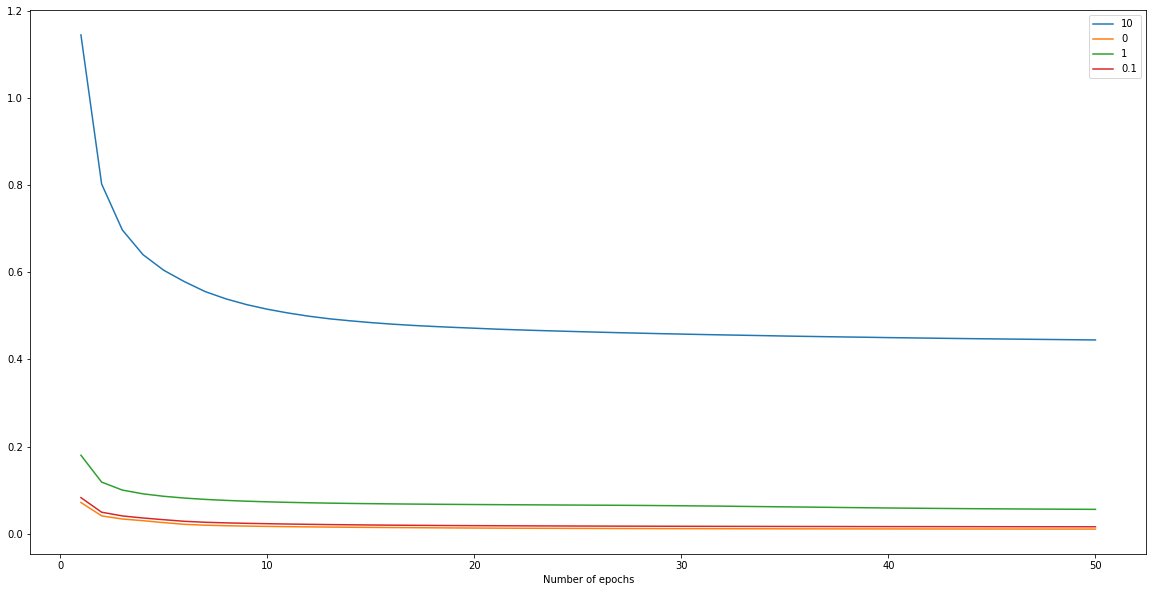

In [35]:
plot_losses_and_labels(non_ae_synthetic_random_bi_lstm_losses, non_ae_synthetic_random_bi_lstm_losses_labels)

###### Distance losses

In [36]:
non_ae_synthetic_random_bi_lstm_test_distance_losses, \
    non_ae_synthetic_random_bi_lstm_test_distance_losses_labels = \
    get_losses_and_labels(CURRENT_ROOT, 'non_ae_synthetic_random_bi_lstm_test_distance_losses_all_epochs')

In [37]:
non_ae_synthetic_random_bi_lstm_train_distance_losses, \
    non_ae_synthetic_random_bi_lstm_train_distance_losses_labels = \
    get_losses_and_labels(CURRENT_ROOT, 'non_ae_synthetic_random_bi_lstm_train_distance_losses_all_epochs')

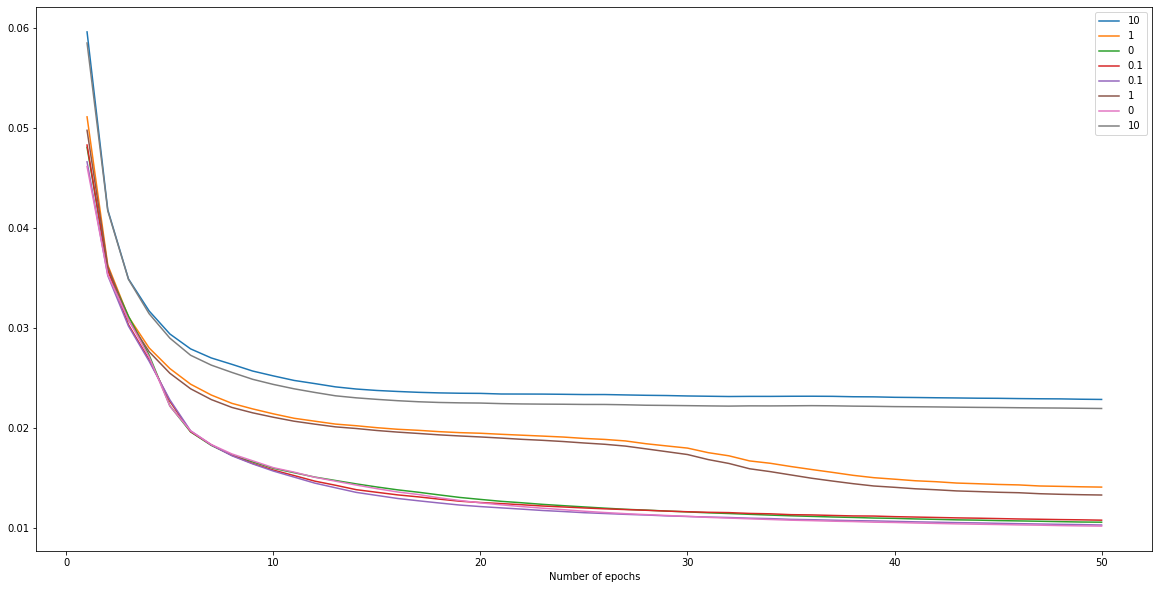

In [38]:
plot_losses_and_labels(non_ae_synthetic_random_bi_lstm_test_distance_losses + \
                       non_ae_synthetic_random_bi_lstm_train_distance_losses, \
                       non_ae_synthetic_random_bi_lstm_test_distance_losses_labels + \
                      non_ae_synthetic_random_bi_lstm_train_distance_losses_labels)

###### Kabsch losses

In [39]:
non_ae_synthetic_random_bi_lstm_test_kabsch_losses, \
    non_ae_synthetic_random_bi_lstm_test_kabsch_losses_labels = \
    get_losses_and_labels(CURRENT_ROOT, 'non_ae_synthetic_random_bi_lstm_test_kabsch_losses_all_epochs')

In [40]:
non_ae_synthetic_random_bi_lstm_train_kabsch_losses, \
    non_ae_synthetic_random_bi_lstm_train_kabsch_losses_labels = \
    get_losses_and_labels(CURRENT_ROOT, 'non_ae_synthetic_random_bi_lstm_train_kabsch_losses_all_epochs')

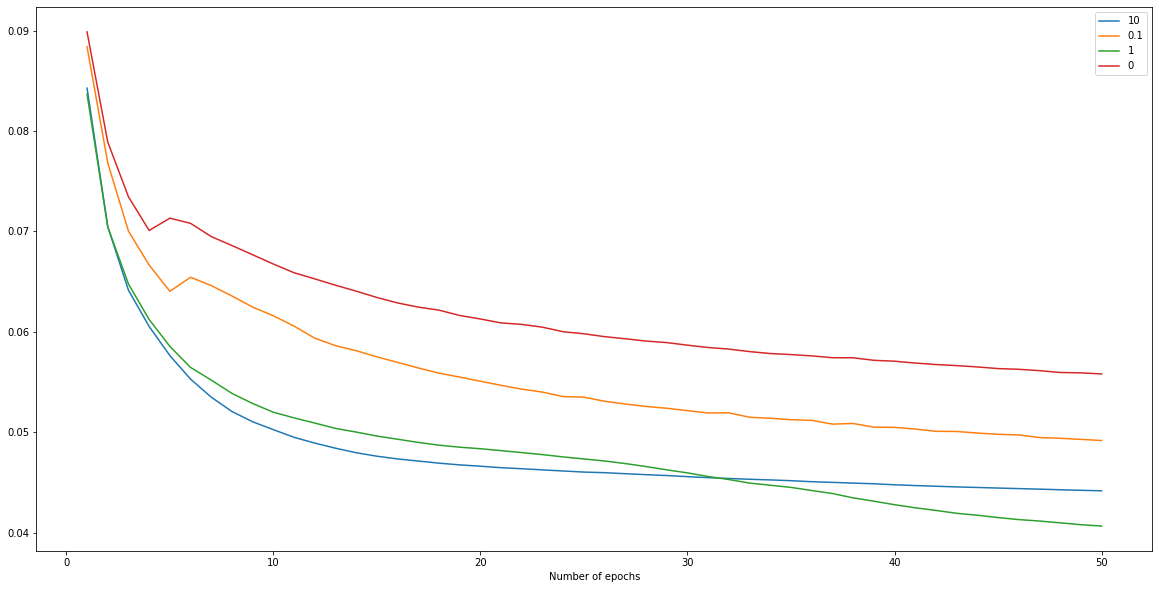

In [41]:
plot_losses_and_labels(non_ae_synthetic_random_bi_lstm_test_kabsch_losses, \
                       non_ae_synthetic_random_bi_lstm_test_kabsch_losses_labels)

###### Trussart Kabsch losses

In [42]:
non_ae_synthetic_random_bi_lstm_trussart_test_kabsch_losses, \
    non_ae_synthetic_random_bi_lstm_trussart_test_kabsch_losses_labels = \
    get_losses_and_labels(CURRENT_ROOT, 'non_ae_synthetic_random_bi_lstm_trussart_test_kabsch_losses_all_epochs')

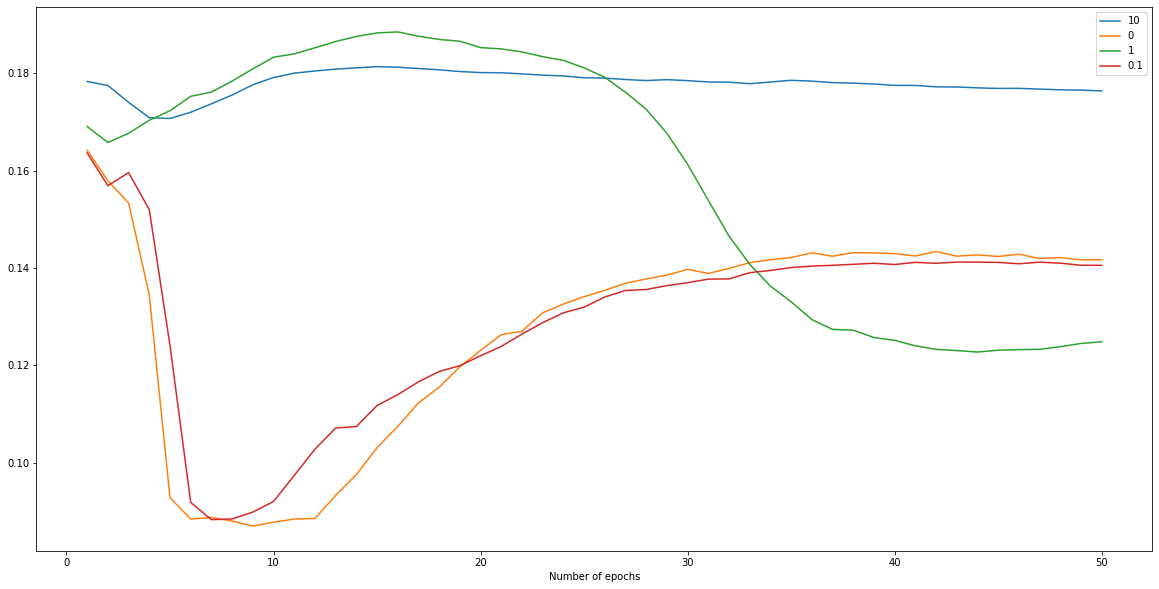

In [43]:
plot_losses_and_labels(non_ae_synthetic_random_bi_lstm_trussart_test_kabsch_losses, \
                       non_ae_synthetic_random_bi_lstm_trussart_test_kabsch_losses_labels)

##### Additional plots

In [44]:
label_to_test_kabsch_loss = dict()

for i in range(len(non_ae_synthetic_random_bi_lstm_test_kabsch_losses)):
    
    label_to_test_kabsch_loss[non_ae_synthetic_random_bi_lstm_test_kabsch_losses_labels[i]] =\
        non_ae_synthetic_random_bi_lstm_test_kabsch_losses[i]

In [45]:
label_to_trussart_test_kabsch_loss = dict()

for i in range(len(non_ae_synthetic_random_bi_lstm_test_kabsch_losses)):
    
    label_to_trussart_test_kabsch_loss[non_ae_synthetic_random_bi_lstm_trussart_test_kabsch_losses_labels[i]] =\
        non_ae_synthetic_random_bi_lstm_trussart_test_kabsch_losses[i]

In [46]:
print(np.min(label_to_trussart_test_kabsch_loss['0']))
print(np.argmin(label_to_trussart_test_kabsch_loss['0']))

print(np.min(label_to_trussart_test_kabsch_loss['0.1']))
print(np.argmin(label_to_trussart_test_kabsch_loss['0.1']))

print(np.min(label_to_trussart_test_kabsch_loss['1']))
print(np.argmin(label_to_trussart_test_kabsch_loss['1']))

print(np.min(label_to_trussart_test_kabsch_loss['10']))
print(np.argmin(label_to_trussart_test_kabsch_loss['10']))

0.08701287846633203
8
0.08833128431633984
6
0.12274613549746304
43
0.17069716453553305
4


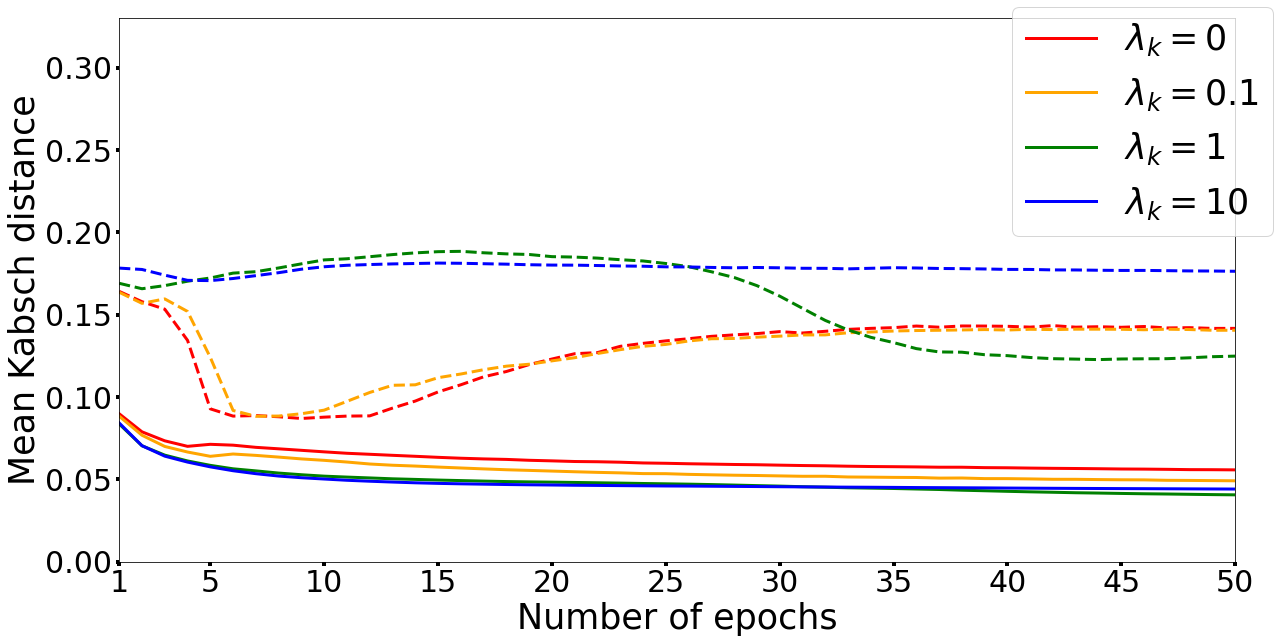

In [47]:
fig, axs = plt.subplots(1, 1, figsize=(20,10))

lambda_kabsch_0_trussart = label_to_trussart_test_kabsch_loss['0']
lambda_kabsch_0 = label_to_test_kabsch_loss['0']

lambda_kabsch_01_trussart = label_to_trussart_test_kabsch_loss['0.1']
lambda_kabsch_01 = label_to_test_kabsch_loss['0.1']

lambda_kabsch_1_trussart = label_to_trussart_test_kabsch_loss['1']
lambda_kabsch_1 = label_to_test_kabsch_loss['1']

lambda_kabsch_10_trussart = label_to_trussart_test_kabsch_loss['10']
lambda_kabsch_10 = label_to_test_kabsch_loss['10']

number_of_epochs = len(lambda_kabsch_01)

axs.plot(range(1,number_of_epochs+1), lambda_kabsch_0, label=r'$\lambda_k = 0$', color='red', linewidth=3)
axs.plot(range(1,number_of_epochs+1), lambda_kabsch_0_trussart, linestyle='dashed', color='red', linewidth=3)

axs.plot(range(1,number_of_epochs+1), lambda_kabsch_01, label=r'$\lambda_k = 0.1$', color='orange', linewidth=3)
axs.plot(range(1,number_of_epochs+1), lambda_kabsch_01_trussart, linestyle='dashed', color='orange', linewidth=3)

axs.plot(range(1,number_of_epochs+1), lambda_kabsch_1, label=r'$\lambda_k = 1$', color='green', linewidth=3)
axs.plot(range(1,number_of_epochs+1), lambda_kabsch_1_trussart, linestyle='dashed', color='green', linewidth=3)

axs.plot(range(1,number_of_epochs+1), lambda_kabsch_10, label=r'$\lambda_k = 10$', color='blue', linewidth=3, alpha=1.0)
axs.plot(range(1,number_of_epochs+1), lambda_kabsch_10_trussart, linestyle='dashed', color='blue', linewidth=3)

axs.set_xlabel('Number of epochs', fontsize = 35)
axs.set_ylabel('Mean Kabsch distance', fontsize = 35)
plt.legend(fontsize=35, loc=(0.8, 0.6))

axs.set_ylim(0, 0.33)
axs.set_xlim(1, number_of_epochs)

l = list(range(0, number_of_epochs+1, 5))
l[0] = 1
plt.xticks(ticks=l, labels=l)

axs.tick_params(axis='both', which='major', labelsize=30, width=4)

plt.savefig('trussart_mean_kabsch_distance_synthetic_random_bi_lstm.png')
plt.show()

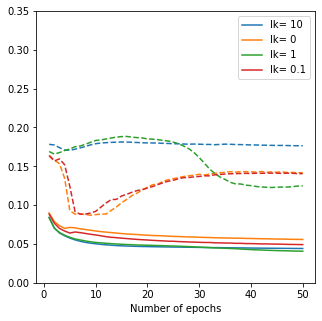

In [48]:
fig, axes = plt.subplots(1, 1, figsize=(5,5))

for label in label_to_trussart_test_kabsch_loss.keys():
    
    color=next(axes._get_lines.prop_cycler)['color']
    number_of_epochs = len(label_to_test_kabsch_loss[label])
    axes.plot(range(1, number_of_epochs + 1), label_to_test_kabsch_loss[label], label= 'lk= ' + label, color=color)
    axes.plot(range(1, number_of_epochs + 1), 
              label_to_trussart_test_kabsch_loss[label], linestyle='dashed', color=color)
    
axes.set_ylim(0, 0.35)
axes.legend()
axes.set(xlabel='Number of epochs')
plt.show()

### Synthetic biological 2

In [49]:
RESULTS_ROOT_TREACH_3D_SYNTHETIC_BIOLOGICAL_2 = RESULTS_ROOT_TREACH_3D + 'synthetic_biological/'

#### Linear

In [50]:
CURRENT_ROOT = RESULTS_ROOT_TREACH_3D_SYNTHETIC_BIOLOGICAL_2 + 'linear/'

##### Combined Losses

In [51]:
non_ae_synthetic_biological_2_linear_losses, non_ae_synthetic_biological_2_linear_losses_labels = \
    get_losses_and_labels(CURRENT_ROOT, 'non_ae_synthetic_biological_2_linear_losses', two_params=True)

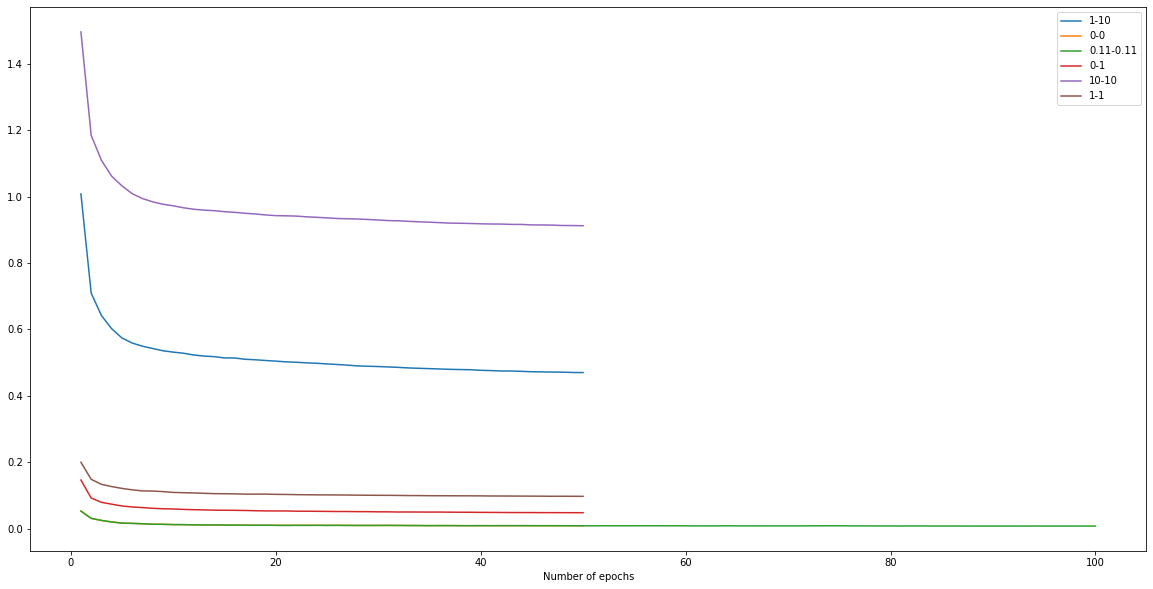

In [52]:
plot_losses_and_labels(non_ae_synthetic_biological_2_linear_losses, 
                       non_ae_synthetic_biological_2_linear_losses_labels)

###### Distance losses

In [53]:
non_ae_synthetic_biological_2_linear_test_distance_losses, \
    non_ae_synthetic_biological_2_linear_test_distance_losses_labels = \
    get_losses_and_labels(CURRENT_ROOT, 'non_ae_synthetic_biological_2_linear_test_distance_losses_all_epochs', 
                          two_params=True)

In [54]:
non_ae_synthetic_biological_2_linear_train_distance_losses, \
    non_ae_synthetic_biological_2_linear_train_distance_losses_labels = \
    get_losses_and_labels(CURRENT_ROOT, 'non_ae_synthetic_biological_2_linear_train_distance_losses_all_epochs', 
                          two_params=True)

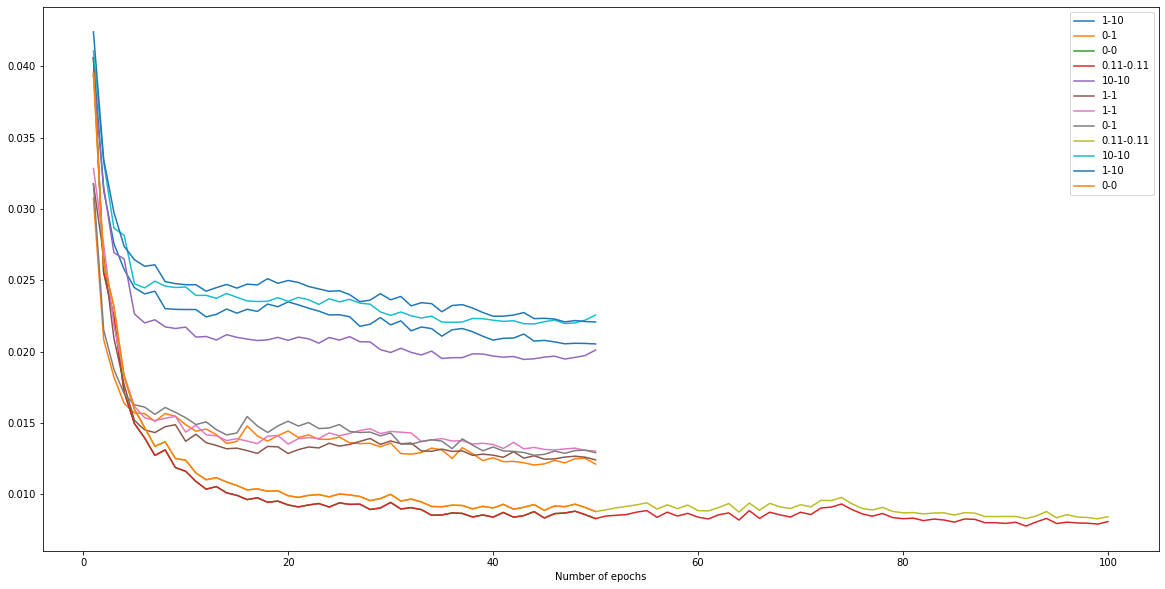

In [55]:
plot_losses_and_labels(non_ae_synthetic_biological_2_linear_test_distance_losses + \
                       non_ae_synthetic_biological_2_linear_train_distance_losses, \
                       non_ae_synthetic_biological_2_linear_test_distance_losses_labels + \
                      non_ae_synthetic_biological_2_linear_train_distance_losses_labels)

###### Kabsch losses

In [56]:
non_ae_synthetic_biological_2_linear_test_kabsch_losses, \
    non_ae_synthetic_biological_2_linear_test_kabsch_losses_labels = \
    get_losses_and_labels(CURRENT_ROOT, 'non_ae_synthetic_biological_2_linear_test_kabsch_losses_all_epochs', 
                          two_params=True)

In [57]:
non_ae_synthetic_biological_2_linear_train_kabsch_losses, \
    non_ae_synthetic_biological_2_linear_train_kabsch_losses_labels = \
    get_losses_and_labels(CURRENT_ROOT, 'non_ae_synthetic_biological_2_linear_train_kabsch_losses_all_epochs', 
                          two_params=True)

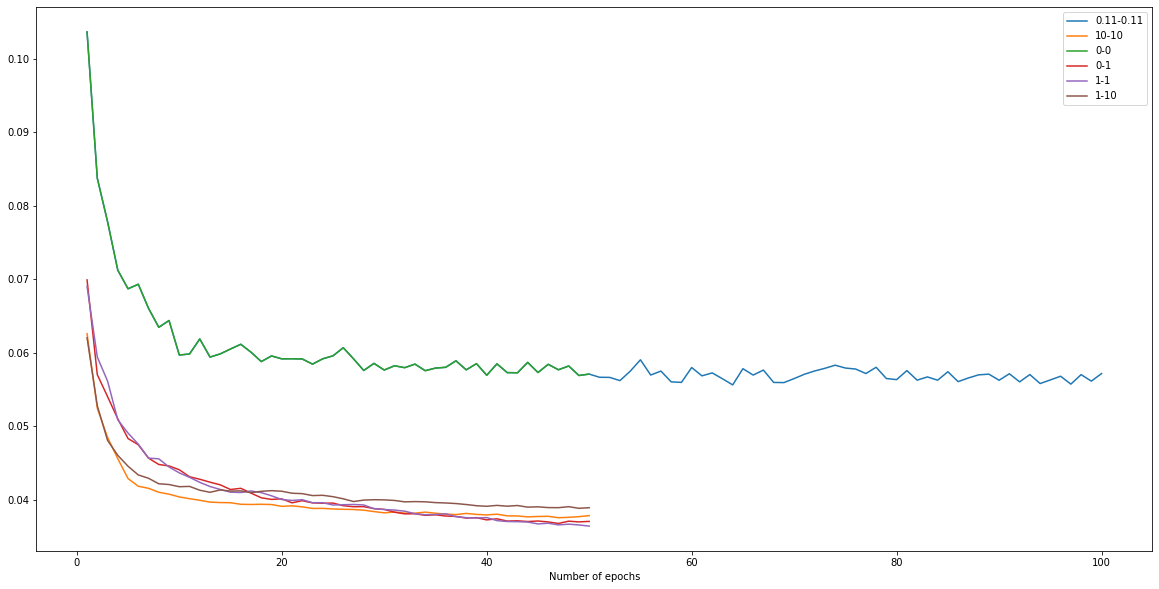

In [58]:
plot_losses_and_labels(non_ae_synthetic_biological_2_linear_test_kabsch_losses, \
                       non_ae_synthetic_biological_2_linear_test_kabsch_losses_labels)

###### Trussart Kabsch losses

In [59]:
non_ae_synthetic_biological_2_linear_trussart_test_kabsch_losses, \
    non_ae_synthetic_biological_2_linear_trussart_test_kabsch_losses_labels = \
    get_losses_and_labels(CURRENT_ROOT, 
                          'non_ae_synthetic_biological_2_linear_trussart_test_kabsch_losses_all_epochs',
                         two_params=True)

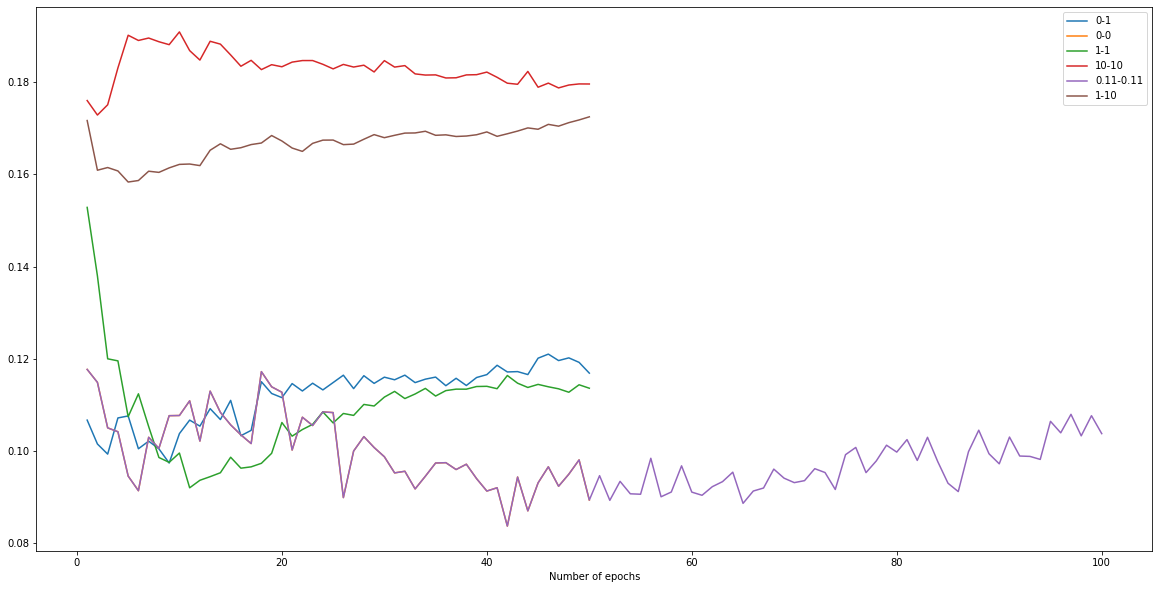

In [60]:
plot_losses_and_labels(non_ae_synthetic_biological_2_linear_trussart_test_kabsch_losses, \
                       non_ae_synthetic_biological_2_linear_trussart_test_kabsch_losses_labels)

##### Additional plots

In [61]:
label_to_test_kabsch_loss = dict()

for i in range(len(non_ae_synthetic_biological_2_linear_test_kabsch_losses)):
    
    label_to_test_kabsch_loss[non_ae_synthetic_biological_2_linear_test_kabsch_losses_labels[i]] =\
        non_ae_synthetic_biological_2_linear_test_kabsch_losses[i]

In [62]:
label_to_trussart_test_kabsch_loss = dict()

for i in range(len(non_ae_synthetic_biological_2_linear_test_kabsch_losses)):
    
    label_to_trussart_test_kabsch_loss[non_ae_synthetic_biological_2_linear_trussart_test_kabsch_losses_labels[i]] =\
        non_ae_synthetic_biological_2_linear_trussart_test_kabsch_losses[i]

In [63]:
print(np.min(lambda_kabsch_0_0_trussart))
print(np.min(lambda_kabsch_0_1_trussart))
print(np.min(lambda_kabsch_1_1_trussart))
print(np.min(lambda_kabsch_1_10_trussart))
print(np.min(lambda_kabsch_10_10_trussart))

NameError: name 'lambda_kabsch_0_0_trussart' is not defined

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(20,10))

lambda_kabsch_0_0_trussart = label_to_trussart_test_kabsch_loss['0-0']
lambda_kabsch_0_0 = label_to_test_kabsch_loss['0-0']

lambda_kabsch_0_1_trussart = label_to_trussart_test_kabsch_loss['0-1']
lambda_kabsch_0_1 = label_to_test_kabsch_loss['0-1']

lambda_kabsch_1_1_trussart = label_to_trussart_test_kabsch_loss['1-1']
lambda_kabsch_1_1 = label_to_test_kabsch_loss['1-1']

lambda_kabsch_1_10_trussart = label_to_trussart_test_kabsch_loss['1-10']
lambda_kabsch_1_10 = label_to_test_kabsch_loss['1-10']

lambda_kabsch_10_10_trussart = label_to_trussart_test_kabsch_loss['10-10']
lambda_kabsch_10_10 = label_to_test_kabsch_loss['10-10']

number_of_epochs = len(lambda_kabsch_0_0_trussart)

axs.plot(range(1,number_of_epochs+1), lambda_kabsch_0_0, label=r'$\lambda_k = 0$   $\lambda_b = 0$', color='red', linewidth=3)
axs.plot(range(1,number_of_epochs+1), lambda_kabsch_0_0_trussart, linestyle='dashed', color='red', linewidth=3)

axs.plot(range(1,number_of_epochs+1), lambda_kabsch_0_1, label=r'$\lambda_k = 1$   $\lambda_b = 0$', color='orange', linewidth=3)
axs.plot(range(1,number_of_epochs+1), lambda_kabsch_0_1_trussart, linestyle='dashed', color='orange', linewidth=3)

axs.plot(range(1,number_of_epochs+1), lambda_kabsch_1_1, label=r'$\lambda_k = 1$   $\lambda_b = 1$', color='green', linewidth=3)
axs.plot(range(1,number_of_epochs+1), lambda_kabsch_1_1_trussart, linestyle='dashed', color='green', linewidth=3)

axs.plot(range(1,number_of_epochs+1), lambda_kabsch_1_10, label=r'$\lambda_k = 10$ $\lambda_b = 1$', color='blue', linewidth=3)
axs.plot(range(1,number_of_epochs+1), lambda_kabsch_1_10_trussart, linestyle='dashed', color='blue', linewidth=3)

axs.plot(range(1,number_of_epochs+1), lambda_kabsch_10_10, label=r'$\lambda_k = 10$ $\lambda_b = 10$', color='purple', linewidth=3)
axs.plot(range(1,number_of_epochs+1), lambda_kabsch_10_10_trussart, linestyle='dashed', color='purple', linewidth=3)

axs.set_xlabel('Number of epochs', fontsize = 35)
axs.set_ylabel('Mean Kabsch distance', fontsize = 35)
plt.legend(fontsize=35, loc=(0.7, 0.6))

axs.set_ylim(0, 0.33)
axs.set_xlim(1, number_of_epochs)

l = list(range(0, number_of_epochs+1, 5))
l[0] = 1
plt.xticks(ticks=l, labels=l)


axs.tick_params(axis='both', which='major', labelsize=30, width=4)

plt.savefig('trussart_mean_kabsch_distance_synthetic_biological_linear.png')
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(5,5))

for label in label_to_trussart_test_kabsch_loss.keys():
    
    color=next(axes._get_lines.prop_cycler)['color']
    number_of_epochs = len(label_to_test_kabsch_loss[label])
    axes.plot(range(1, number_of_epochs + 1), label_to_test_kabsch_loss[label], label= 'lk= ' + label, color=color)
    axes.plot(range(1, number_of_epochs + 1), 
              label_to_trussart_test_kabsch_loss[label], linestyle='dashed', color=color)
    
axes.set_ylim(0, 0.35)
axes.legend()
axes.set(xlabel='Number of epochs')
plt.show()

#### Bi-LSTM

In [ ]:
CURRENT_ROOT = RESULTS_ROOT_TREACH_3D_SYNTHETIC_BIOLOGICAL_2 + 'bi_lstm/'

##### Combined Losses

In [ ]:
non_ae_synthetic_biological_2_bi_lstm_losses, non_ae_synthetic_biological_2_bi_lstm_losses_labels = \
    get_losses_and_labels(CURRENT_ROOT, 'non_ae_synthetic_biological_2_bi_lstm_losses', two_params=True)

In [ ]:
plot_losses_and_labels(non_ae_synthetic_biological_2_bi_lstm_losses, 
                       non_ae_synthetic_biological_2_bi_lstm_losses_labels)

###### Distance losses

In [ ]:
non_ae_synthetic_biological_2_bi_lstm_test_distance_losses, \
    non_ae_synthetic_biological_2_bi_lstm_test_distance_losses_labels = \
    get_losses_and_labels(CURRENT_ROOT, 'non_ae_synthetic_biological_2_bi_lstm_test_distance_losses_all_epochs', 
                          two_params=True)

In [ ]:
non_ae_synthetic_biological_2_bi_lstm_train_distance_losses, \
    non_ae_synthetic_biological_2_bi_lstm_train_distance_losses_labels = \
    get_losses_and_labels(CURRENT_ROOT, 'non_ae_synthetic_biological_2_bi_lstm_train_distance_losses_all_epochs', 
                          two_params=True)

In [ ]:
plot_losses_and_labels(non_ae_synthetic_biological_2_bi_lstm_test_distance_losses + \
                       non_ae_synthetic_biological_2_bi_lstm_train_distance_losses, \
                       non_ae_synthetic_biological_2_bi_lstm_test_distance_losses_labels + \
                      non_ae_synthetic_biological_2_bi_lstm_train_distance_losses_labels)

###### Kabsch losses

In [ ]:
non_ae_synthetic_biological_2_bi_lstm_test_kabsch_losses, \
    non_ae_synthetic_biological_2_bi_lstm_test_kabsch_losses_labels = \
    get_losses_and_labels(CURRENT_ROOT, 'non_ae_synthetic_biological_2_bi_lstm_test_kabsch_losses_all_epochs', 
                          two_params=True)

In [ ]:
non_ae_synthetic_biological_2_bi_lstm_train_kabsch_losses, \
    non_ae_synthetic_biological_2_bi_lstm_train_kabsch_losses_labels = \
    get_losses_and_labels(CURRENT_ROOT, 'non_ae_synthetic_biological_2_bi_lstm_train_kabsch_losses_all_epochs', 
                          two_params=True)

In [ ]:
plot_losses_and_labels(non_ae_synthetic_biological_2_bi_lstm_test_kabsch_losses, \
                       non_ae_synthetic_biological_2_bi_lstm_test_kabsch_losses_labels)

###### Trussart Kabsch losses

In [ ]:
non_ae_synthetic_biological_2_bi_lstm_trussart_test_kabsch_losses, \
    non_ae_synthetic_biological_2_bi_lstm_trussart_test_kabsch_losses_labels = \
    get_losses_and_labels(CURRENT_ROOT, 
                          'non_ae_synthetic_biological_2_bi_lstm_trussart_test_kabsch_losses_all_epochs',
                         two_params=True)

In [ ]:
plot_losses_and_labels(non_ae_synthetic_biological_2_bi_lstm_trussart_test_kabsch_losses, \
                       non_ae_synthetic_biological_2_bi_lstm_trussart_test_kabsch_losses_labels)

##### Additional plots

In [ ]:
label_to_test_kabsch_loss = dict()

for i in range(len(non_ae_synthetic_biological_2_bi_lstm_test_kabsch_losses)):
    
    label_to_test_kabsch_loss[non_ae_synthetic_biological_2_bi_lstm_test_kabsch_losses_labels[i]] =\
        non_ae_synthetic_biological_2_bi_lstm_test_kabsch_losses[i]

In [ ]:
label_to_trussart_test_kabsch_loss = dict()

for i in range(len(non_ae_synthetic_biological_2_bi_lstm_test_kabsch_losses)):
    
    label_to_trussart_test_kabsch_loss[non_ae_synthetic_biological_2_bi_lstm_trussart_test_kabsch_losses_labels[i]] =\
        non_ae_synthetic_biological_2_bi_lstm_trussart_test_kabsch_losses[i]

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(20,10))

lambda_kabsch_0_0_trussart = label_to_trussart_test_kabsch_loss['0-0']
lambda_kabsch_0_0 = label_to_test_kabsch_loss['0-0']

lambda_kabsch_0_1_trussart = label_to_trussart_test_kabsch_loss['0-1']
lambda_kabsch_0_1 = label_to_test_kabsch_loss['0-1']

lambda_kabsch_1_1_trussart = label_to_trussart_test_kabsch_loss['1-1']
lambda_kabsch_1_1 = label_to_test_kabsch_loss['1-1']

lambda_kabsch_1_10_trussart = label_to_trussart_test_kabsch_loss['1-10']
lambda_kabsch_1_10 = label_to_test_kabsch_loss['1-10']

lambda_kabsch_10_10_trussart = label_to_trussart_test_kabsch_loss['10-10']
lambda_kabsch_10_10 = label_to_test_kabsch_loss['10-10']

number_of_epochs = len(lambda_kabsch_0_0_trussart)

axs.plot(range(1,number_of_epochs+1), lambda_kabsch_0_0, label=r'$\lambda_k = 0$   $\lambda_b = 0$', color='red', linewidth=3)
axs.plot(range(1,number_of_epochs+1), lambda_kabsch_0_0_trussart, linestyle='dashed', color='red', linewidth=3)

axs.plot(range(1,number_of_epochs+1), lambda_kabsch_0_1, label=r'$\lambda_k = 1$   $\lambda_b = 0$', color='orange', linewidth=3)
axs.plot(range(1,number_of_epochs+1), lambda_kabsch_0_1_trussart, linestyle='dashed', color='orange', linewidth=3)

axs.plot(range(1,number_of_epochs+1), lambda_kabsch_1_1, label=r'$\lambda_k = 1$   $\lambda_b = 1$', color='green', linewidth=3)
axs.plot(range(1,number_of_epochs+1), lambda_kabsch_1_1_trussart, linestyle='dashed', color='green', linewidth=3)

axs.plot(range(1,number_of_epochs+1), lambda_kabsch_1_10, label=r'$\lambda_k = 10$ $\lambda_b = 1$', color='blue', linewidth=3)
axs.plot(range(1,number_of_epochs+1), lambda_kabsch_1_10_trussart, linestyle='dashed', color='blue', linewidth=3)

axs.plot(range(1,number_of_epochs+1), lambda_kabsch_10_10, label=r'$\lambda_k = 10$ $\lambda_b = 10$', color='purple', linewidth=3)
axs.plot(range(1,number_of_epochs+1), lambda_kabsch_10_10_trussart, linestyle='dashed', color='purple', linewidth=3)

axs.set_xlabel('Number of epochs', fontsize = 35)
axs.set_ylabel('Mean Kabsch distance', fontsize = 35)
plt.legend(fontsize=35, loc=(0.7, 0.02))

axs.set_ylim(0, 0.33)
axs.set_xlim(1, number_of_epochs)

l = list(range(0, number_of_epochs+1, 5))
l[0] = 1
plt.xticks(ticks=l, labels=l)

axs.tick_params(axis='both', which='major', labelsize=30, width=4)

plt.savefig('trussart_mean_kabsch_distance_synthetic_biological_bi_lstm.png')
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(5,5))

for label in label_to_trussart_test_kabsch_loss.keys():
    
    color=next(axes._get_lines.prop_cycler)['color']
    number_of_epochs = len(label_to_test_kabsch_loss[label])
    axes.plot(range(1, number_of_epochs + 1), label_to_test_kabsch_loss[label], label= 'lk= ' + label, color=color)
    axes.plot(range(1, number_of_epochs + 1), 
              label_to_trussart_test_kabsch_loss[label], linestyle='dashed', color=color)
    
axes.set_ylim(0, 0.35)
axes.legend()
axes.set(xlabel='Number of epochs')
plt.show()